In [1]:
import numpy as np
import pandas as pd

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head(6)

Размеры датасета (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579
5,1,3.0,2.474979e+06,0,21.0,Homemaker,1.001654e+07,1.0,0.326801



Про Датасет

Датасет представляет собой информацию по жителям некоторого города.

    was_married - Был ли когда-либо женат/замужем
    children - Количество детей
    salary - Уровень зарплаты
    sex - Пол (0 - женщина, 1 - мужчина)
    age - Возраст
    home_cost - Сумарная стоимость жилья/недвижимости
    Professon - Профессия
    drive_info - Есть ли водительские права
    happyness - уровень счастья по результатам опроса



Задание 1. Чистка датасета

Изучите датасет в Jupyter Notebook и подумайте, есть ли дубли в данных. Если есть — удалите их (drop_duplicates). Также найдите и удалите выбросы по признаку home_cost.

In [3]:
# Удаление дубликатов
data_work = data.drop_duplicates(keep='first')

# Удаление столбцов с пропусками
data_work = data_work.dropna(axis=1)

#  удалить выбросы по признаку `home_cost` (определение выбросов - см предыдущее ДЗ)
data_work = data_work.loc[data_work['home_cost'] < 10600000].copy()

print("\nРазмеры датасета", data_work.shape)
data_work.head(6)


Размеры датасета (5995, 8)


,was_married,children,salary,sex,age,profession,home_cost,happyness
id,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,0.657579
5,1,3.0,2.474979e+06,0,21.0,Homemaker,1.001654e+07,0.326801


Задание 2. Проверка гипотез с применением критериев

1. Перед вами знакомый датасет из прошлых домашних заданий. Вы уже научились применять подходящий статистический критерий для двух групп, теперь вам предстоит научиться верно применять критерии для нескольких групп одновременно. Изучите и проверьте следующие гипотезы, используя подходящие статистические критерии:
— Правда ли, что у представителей профессий Homemaker, Marketing, Healthcare и Executive зарплаты в среднем не различаются? Ответьте и подкрепите ответ визуализацией и подходящим статистическим критерием.
— Правда ли, что у представителей профессий Doctor, Entertainment и Lawyer зарплаты в среднем не различаются? Ответьте и подкрепите ответ визуализацией и подходящим статистическим критерием.
— Допустим, вы рассматриваете четыре группы населения, различающиеся количеством детей.

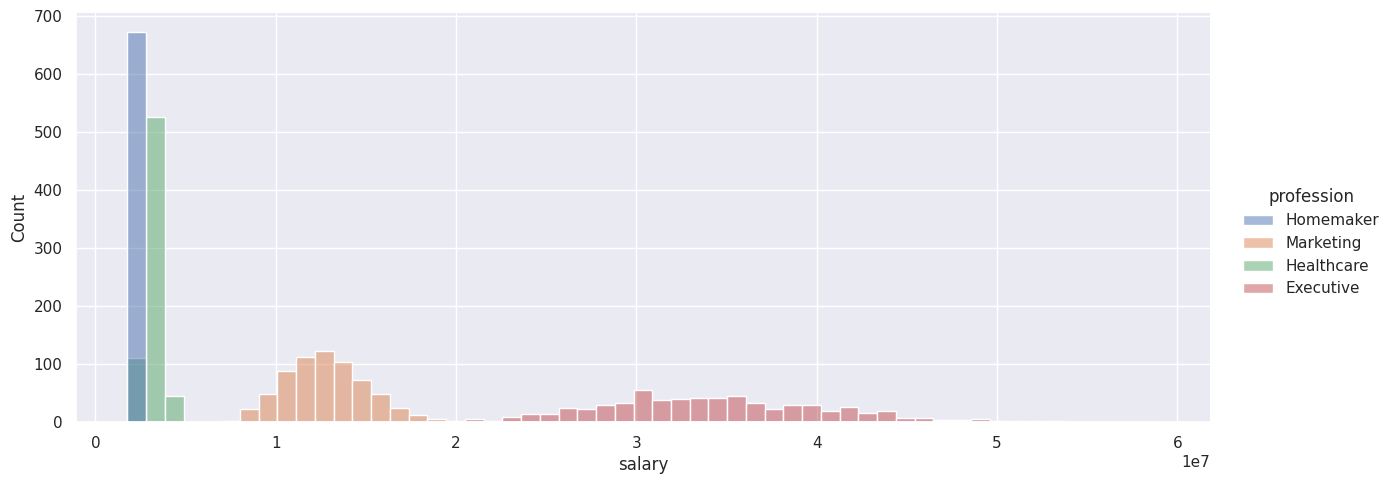

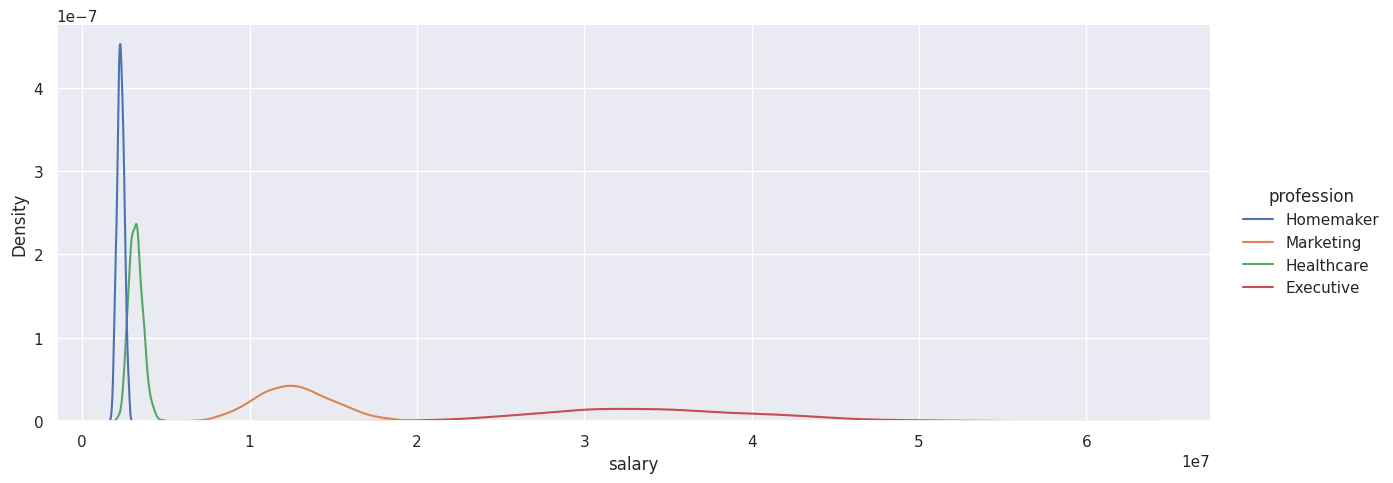

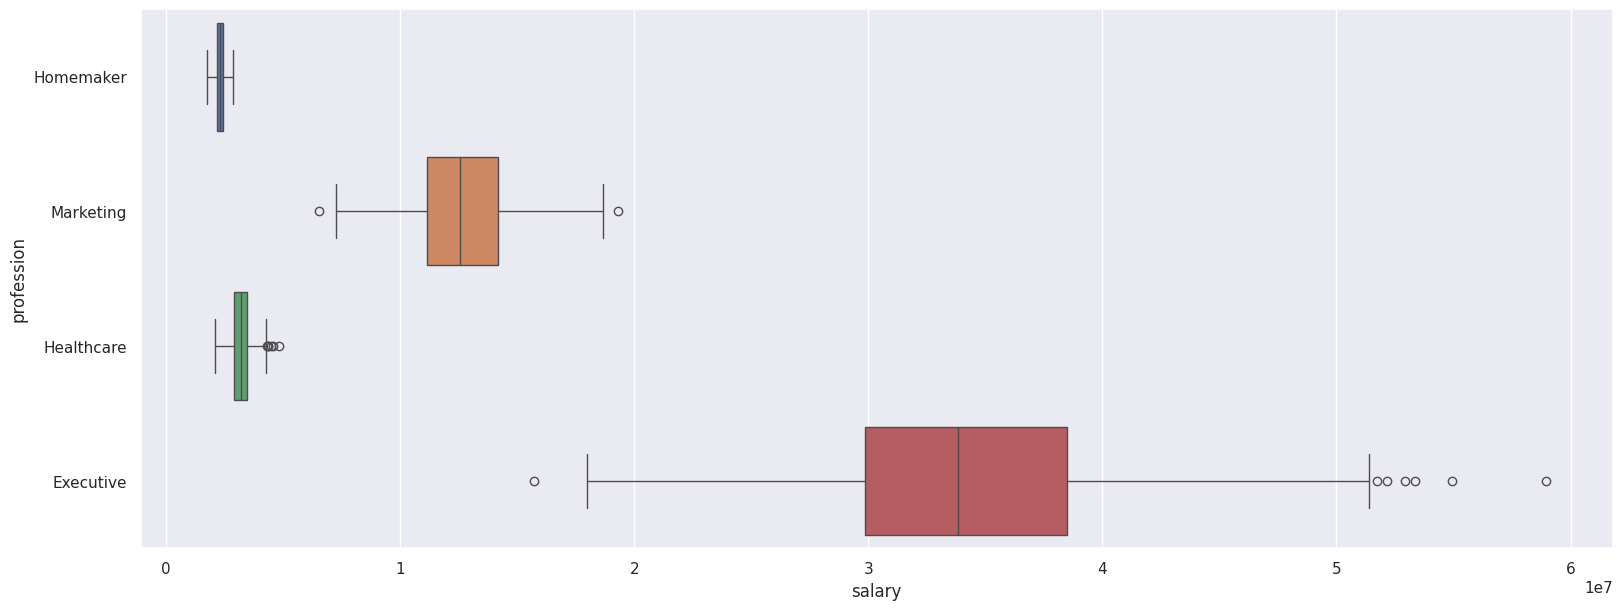

In [4]:
# Отберем только нужные группы
sub_data = data_work[data_work["profession"].isin(['Homemaker', 'Marketing', 'Healthcare', 'Executive'])]

# Гистограммы
sns.displot(sub_data, x="salary", hue="profession", bins=55, height=5, aspect=2.5)

# Гистограммы со сглаживанием
sns.displot(sub_data, x="salary", hue="profession", height=5, aspect=2.5, kind="kde")

# Бокс-плоты
plt.figure(figsize=(19, 7))
sns.boxplot(data=sub_data, y="profession", x="salary", hue="profession", orient='h');

In [5]:
alpha = 0.05

Homemaker = sub_data[sub_data["profession"] == "Homemaker"]["salary"].values
Marketing = sub_data[sub_data["profession"] == "Marketing"]["salary"].values
Healthcare = sub_data[sub_data["profession"] == "Healthcare"]["salary"].values
Executive = sub_data[sub_data["profession"] == "Executive"]["salary"].values

# Используем дисперсионнай анализ
statistic, pvalue = stats.f_oneway(
    Homemaker, Marketing, Healthcare, Executive,
)

print("Используем дисперсионнай анализ:")
print("statistic = {}, p-value = {}".format(statistic, pvalue))

if pvalue > alpha:  # Интерпретируем результат
    print("Одинаковое распределение (не отвергаем H0)")
else:
    print("Разное распределение (отклоняем H0)")
    print("Выборки отличаются статистически значимо")

# Теперь вычисляем Крускал Уоллис тест
statistic, pvalue = stats.kruskal(
    Homemaker, Marketing, Healthcare, Executive,
)

print("\nТеперь вычисляем Крускал Уоллис тест:")
print("statistic = {}, p-value = {}".format(statistic, pvalue))

if pvalue > alpha:  # Интерпретируем результат
    print("Одинаковое распределение (не отвергаем H0)")
else:
    print("Разное распределение (отклоняем H0)")
    print("Выборки отличаются статистически значимо")

Используем дисперсионнай анализ:
statistic = 12655.23046474974, p-value = 0.0
Разное распределение (отклоняем H0)
Выборки отличаются статистически значимо

Теперь вычисляем Крускал Уоллис тест:
statistic = 2490.565191992131, p-value = 0.0
Разное распределение (отклоняем H0)
Выборки отличаются статистически значимо


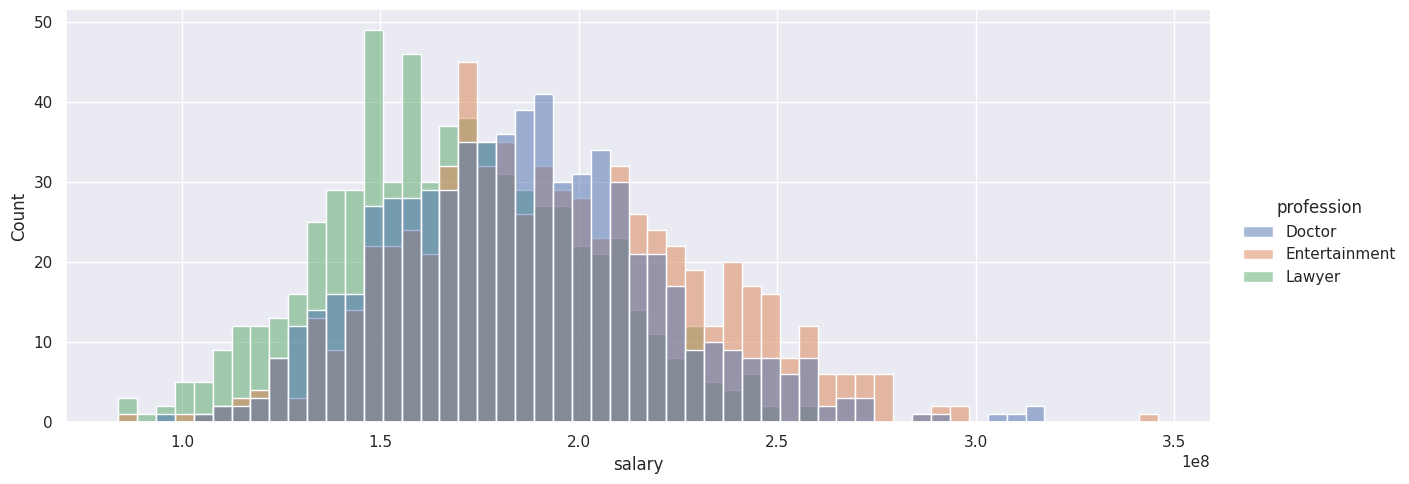

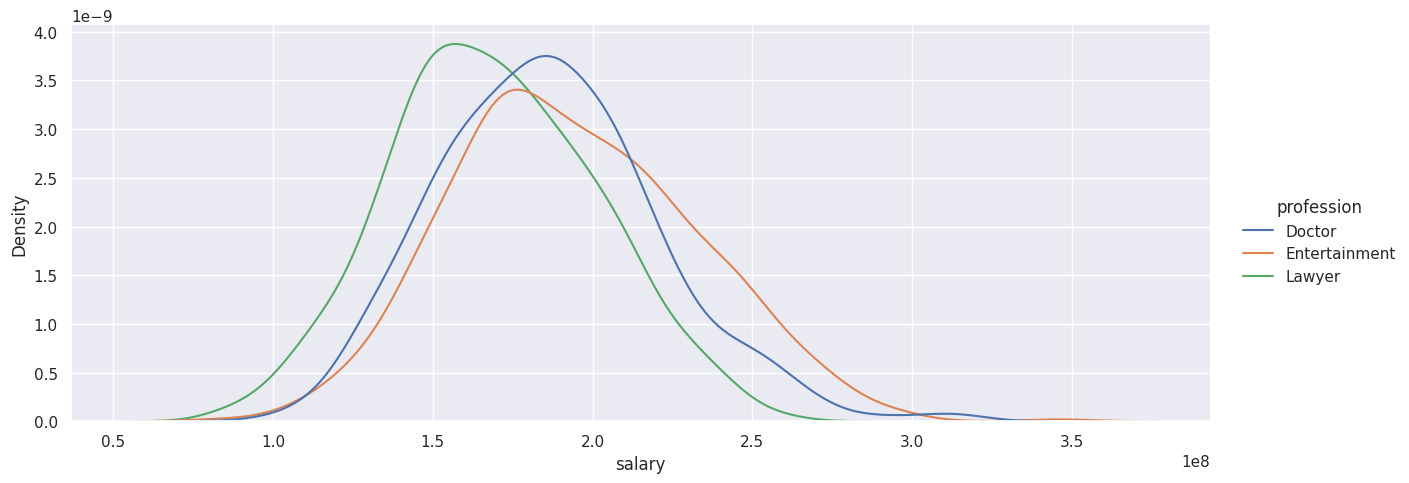

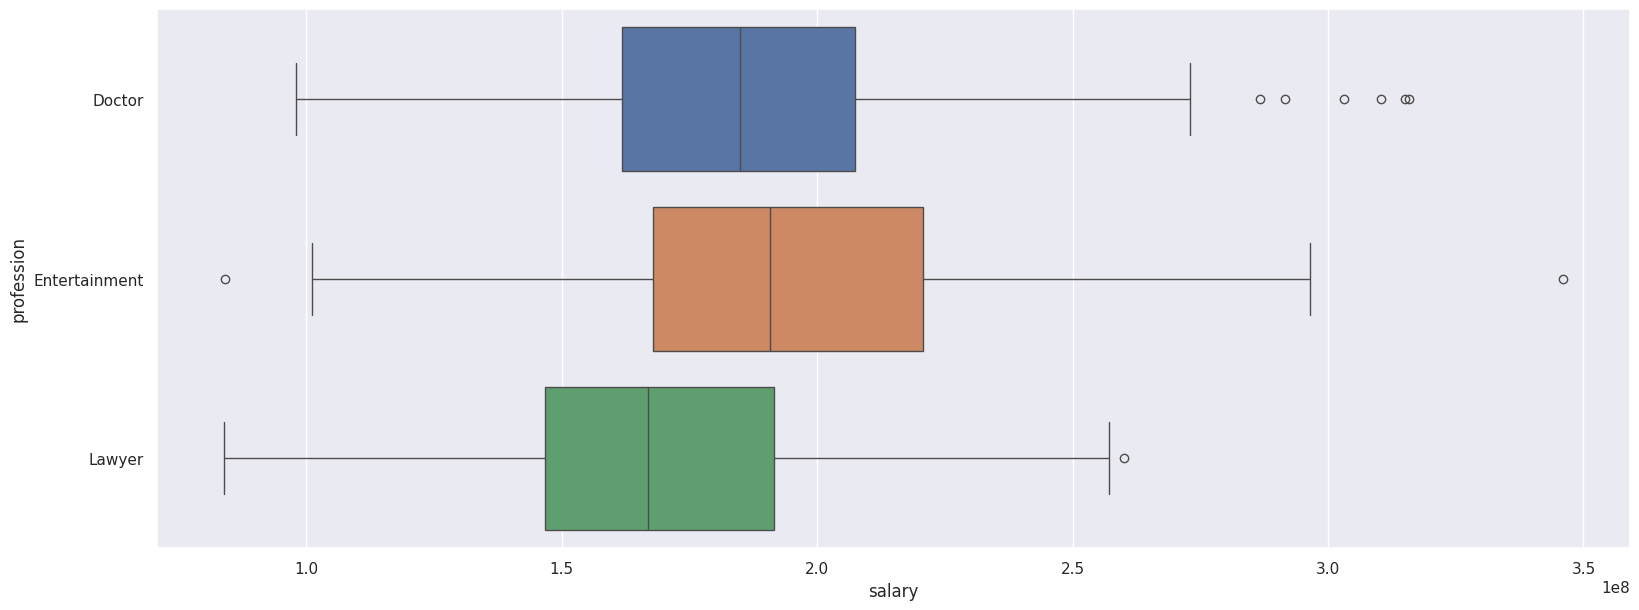

In [6]:
# Отберем только нужные группы
sub_data = data_work[data_work["profession"].isin(['Doctor', 'Entertainment', 'Lawyer'])]

# Гистограммы
sns.displot(sub_data, x="salary", hue="profession", bins=55, height=5, aspect=2.5)

# Гистограммы со сглаживанием
sns.displot(sub_data, x="salary", hue="profession", height=5, aspect=2.5, kind="kde")

# Бокс-плоты
plt.figure(figsize=(19, 7))
sns.boxplot(data=sub_data, y="profession", x="salary", hue="profession", orient='h');

In [7]:
alpha = 0.05

Lawyer = sub_data[sub_data["profession"] == "Lawyer"]["salary"].values
Entertainment = sub_data[sub_data["profession"] == "Entertainment"]["salary"].values
Doctor = sub_data[sub_data["profession"] == "Doctor"]["salary"].values

# Используем дисперсионнай анализ
statistic, pvalue = stats.f_oneway(
    Lawyer,
    Entertainment,
    Doctor,
)

print("Используем дисперсионнай анализ:")
print("statistic = {}, p-value = {}".format(statistic, pvalue))

if pvalue > alpha:  # Интерпретируем результат
    print("Одинаковое распределение (не отвергаем H0)")
else:
    print("Разное распределение (отклоняем H0)")
    print("Выборки отличаются статистически значимо")

# Теперь вычисляем Крускал Уоллис тест
statistic, pvalue = stats.kruskal(
    Lawyer,
    Entertainment,
    Doctor,
)

print("\nТеперь вычисляем Крускал Уоллис тест:")
print("statistic = {}, p-value = {}".format(statistic, pvalue))

if pvalue > alpha:  # Интерпретируем результат
    print("Одинаковое распределение (не отвергаем H0)")
else:
    print("Разное распределение (отклоняем H0)")
    print("Выборки отличаются статистически значимо")

Используем дисперсионнай анализ:
statistic = 89.56052385242253, p-value = 5.67666591800931e-38
Разное распределение (отклоняем H0)
Выборки отличаются статистически значимо

Теперь вычисляем Крускал Уоллис тест:
statistic = 151.84535689991753, p-value = 1.0646324464025486e-33
Разное распределение (отклоняем H0)
Выборки отличаются статистически значимо




Допустим вы рассматриваете 4 группы населения, отличающихся количеством детей. Группы следующие.

    A - нет детей

    B - 1 ребенок

    C - от 2 до 4 детей

    D - от 5 детей

    Правда ли, что эти группы отличаются статистически значимо по уровню дохода и уровню счастья? Ответ поддержите статистическими критериями и визуализацией



— Правда ли, что у представителей профессий Homemaker, Marketing, Healthcare и Executive зарплаты в среднем не различаются? Ответьте и подкрепите ответ визуализацией и подходящим статистическим критерием. - Не правда: между представителями таких профессий как, Homemaker, Marketing, Healthcare и Executive в среднем зарплаты отличаются между собой
— Правда ли, что у представителей профессий Doctor, Entertainment и Lawyer зарплаты в среднем не различаются? Ответьте и подкрепите ответ визуализацией и подходящим статистическим критерием. - Не правда: между представителями таких профессий как, Doctor, Entertainment и Lawyer в среднем зарплаты отличаются между собой
— Допустим, вы рассматриваете четыре группы населения, различающиеся количеством детей. - Правда: эти группы отличаются статистически значимо по уровню дохода


Допустим вы рассматриваете 4 группы населения, отличающихся количеством детей. Группы следующие.

    A - нет детей

    B - 1 ребенок

    C - от 2 до 4 детей

    D - от 5 детей

    Правда ли, что эти группы отличаются статистически значимо по уровню дохода и уровню счастья? Ответ поддержите статистическими критериями и визуализацией



3. Правда ли, что эти группы статистически значимо различаются по уровню дохода и уровню счастья? Ответьте и подкрепите ответ визуализацией и подходящим статистическим критерием.

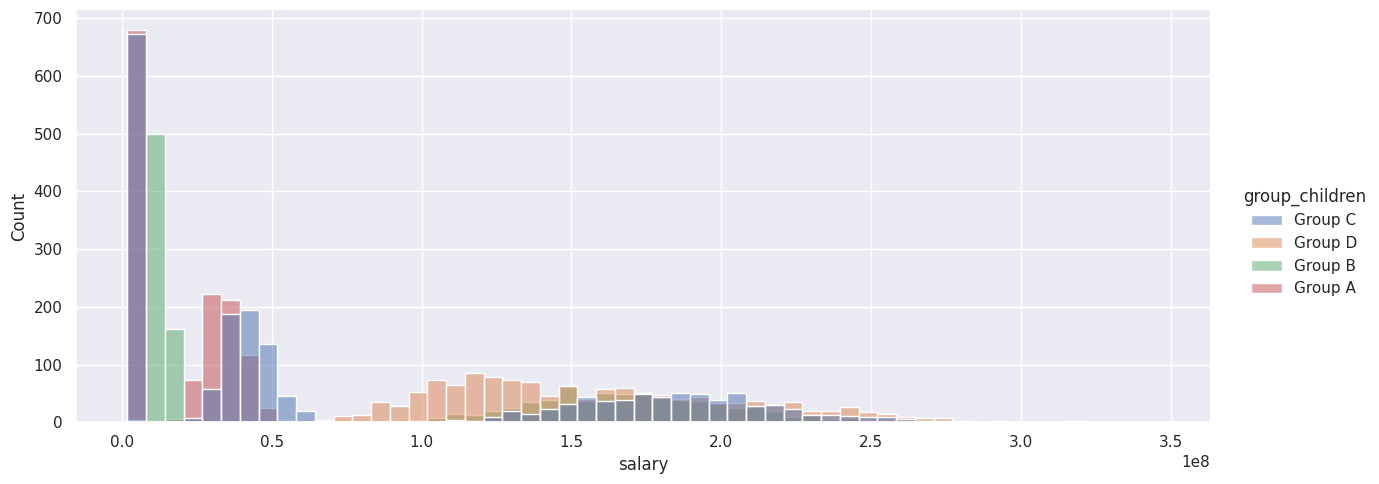

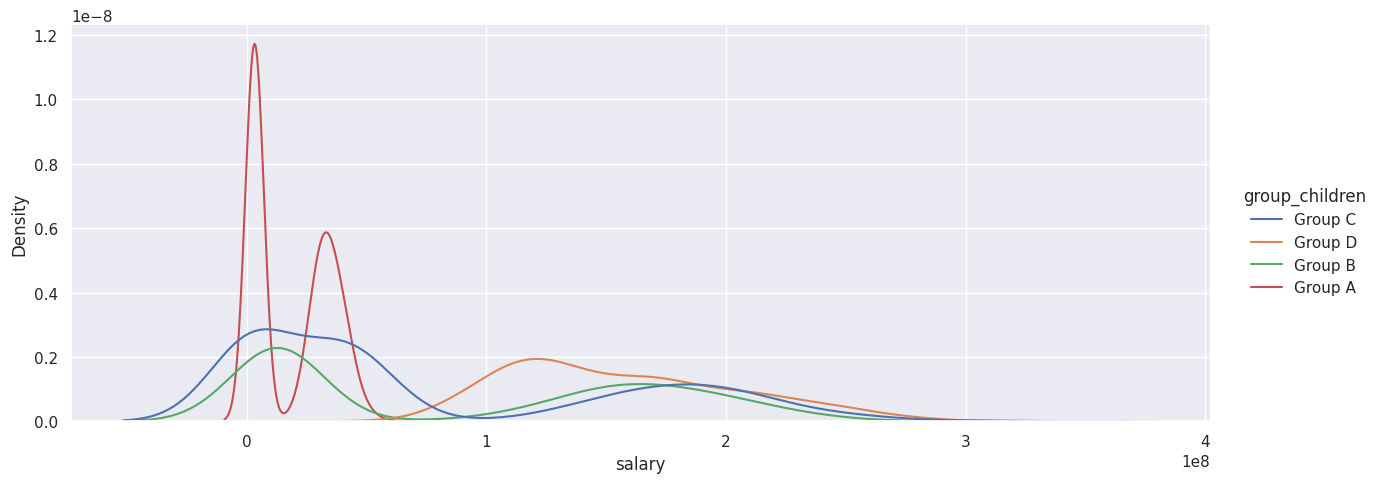

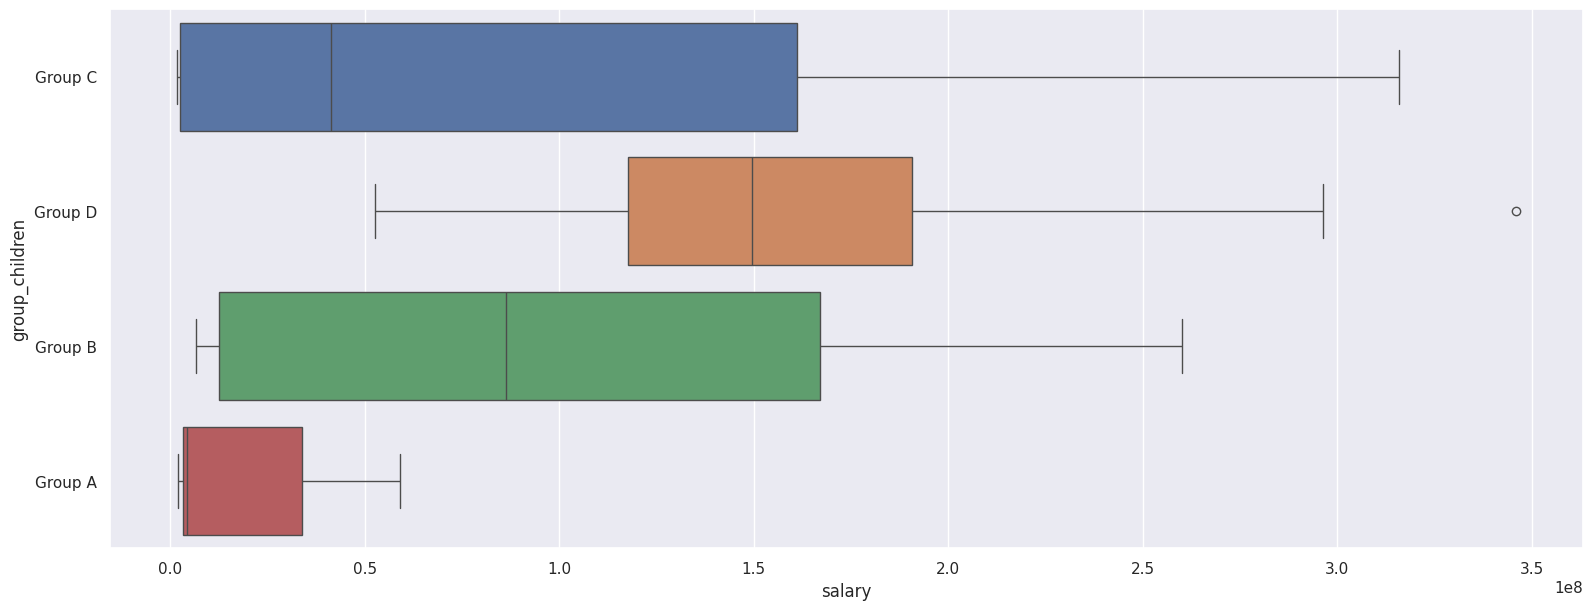

In [8]:
sub_data = data_work.copy()
# Создание нового столбца "group_children" с классификацией по количеству детей
sub_data['group_children'] = [
    "Group A" if x == 0 else "Group B" if x == 1 else "Group C" if 1 < x < 5 else "Group D" if x >= 5 else "Unknown"
    for x in data_work["children"]
]

# Гистограммы
sns.displot(sub_data, x="salary", hue="group_children", bins=55, height=5, aspect=2.5)

# Гистограммы со сглаживанием
sns.displot(sub_data, x="salary", hue="group_children", height=5, aspect=2.5, kind="kde")

# Бокс-плоты
plt.figure(figsize=(19, 7))
sns.boxplot(data=sub_data, y="group_children", x="salary", hue="group_children", orient='h');

In [9]:
alpha = 0.05

# Группы по количеству детей
group_a = data_work[data_work["children"] == 0]["salary"]  # Нет детей
group_b = data_work[data_work["children"] == 1]["salary"]  # Один ребёнок
group_c = data_work[(data_work["children"] > 1) & (data_work["children"] < 5)]["salary"]  # От 2 до 4 детей
group_d = data_work[data_work["children"] >= 5]["salary"]  # Пять и более детей
# Используем дисперсионнай анализ
statistic, pvalue = stats.f_oneway(
    group_a,
    group_b,
    group_c,
    group_d,
)

print("Используем дисперсионнай анализ:")
print("statistic = {}, p-value = {}".format(statistic, pvalue))

if pvalue > alpha:  # Интерпретируем результат
    print("Одинаковое распределение (не отвергаем H0)")
else:
    print("Разное распределение (отклоняем H0)")
    print("Выборки отличаются статистически значимо")

# Теперь вычисляем Крускал Уоллис тест
statistic, pvalue = stats.kruskal(
    group_a,
    group_b,
    group_c,
    group_d,
)

print("\nТеперь вычисляем Крускал Уоллис тест:")
print("statistic = {}, p-value = {}".format(statistic, pvalue))

if pvalue > alpha:  # Интерпретируем результат
    print("Одинаковое распределение (не отвергаем H0)")
else:
    print("Разное распределение (отклоняем H0)")
    print("Выборки отличаются статистически значимо")

Используем дисперсионнай анализ:
statistic = 1019.4561626169304, p-value = 0.0
Разное распределение (отклоняем H0)
Выборки отличаются статистически значимо

Теперь вычисляем Крускал Уоллис тест:
statistic = 1745.8795924199912, p-value = 0.0
Разное распределение (отклоняем H0)
Выборки отличаются статистически значимо


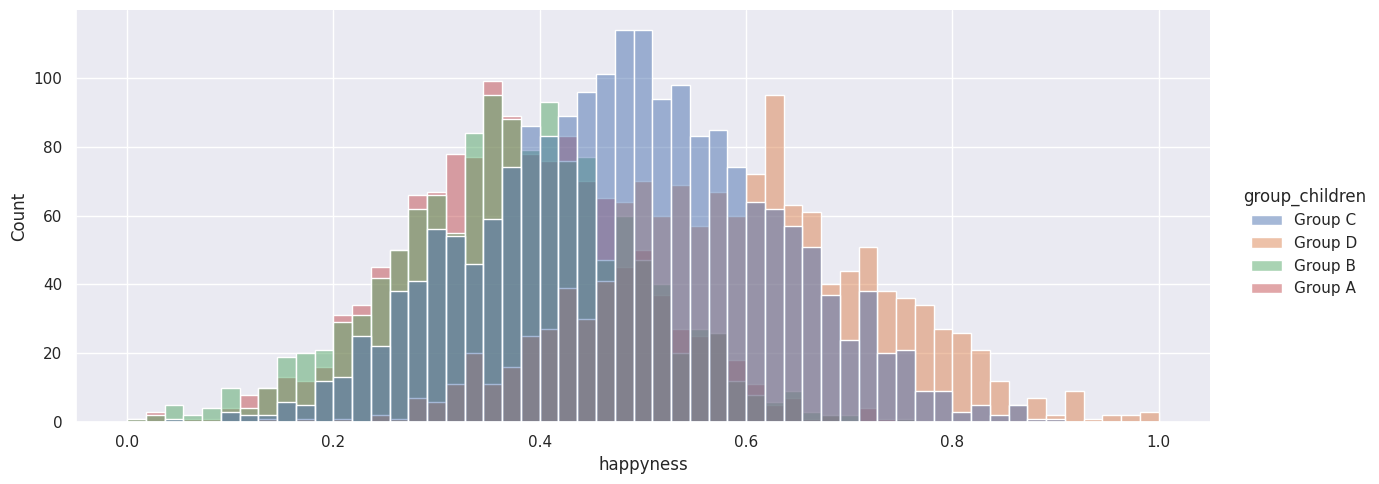

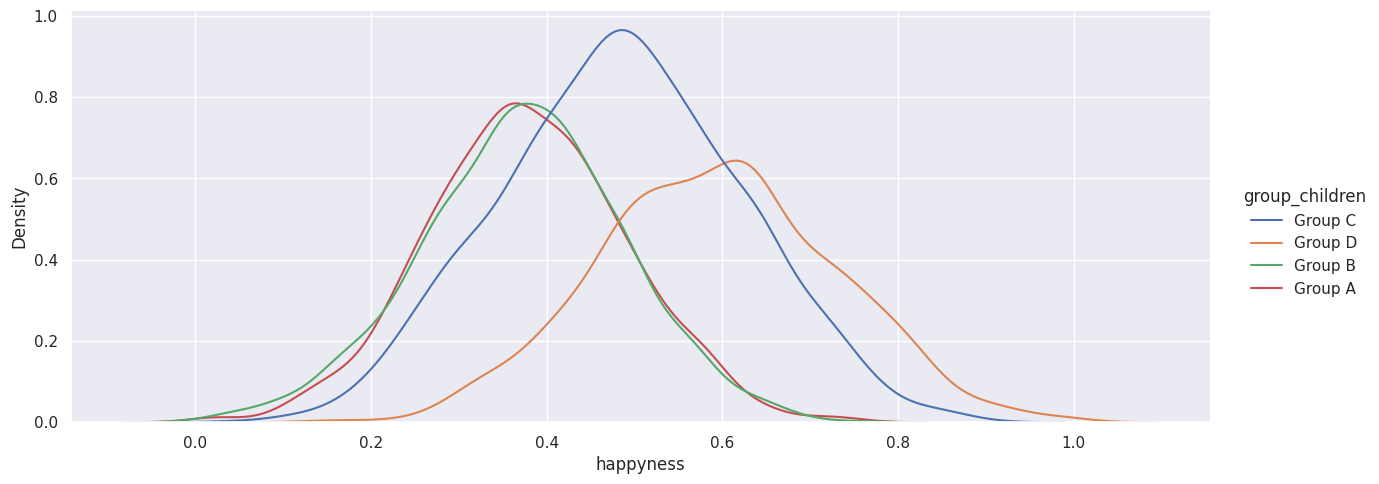

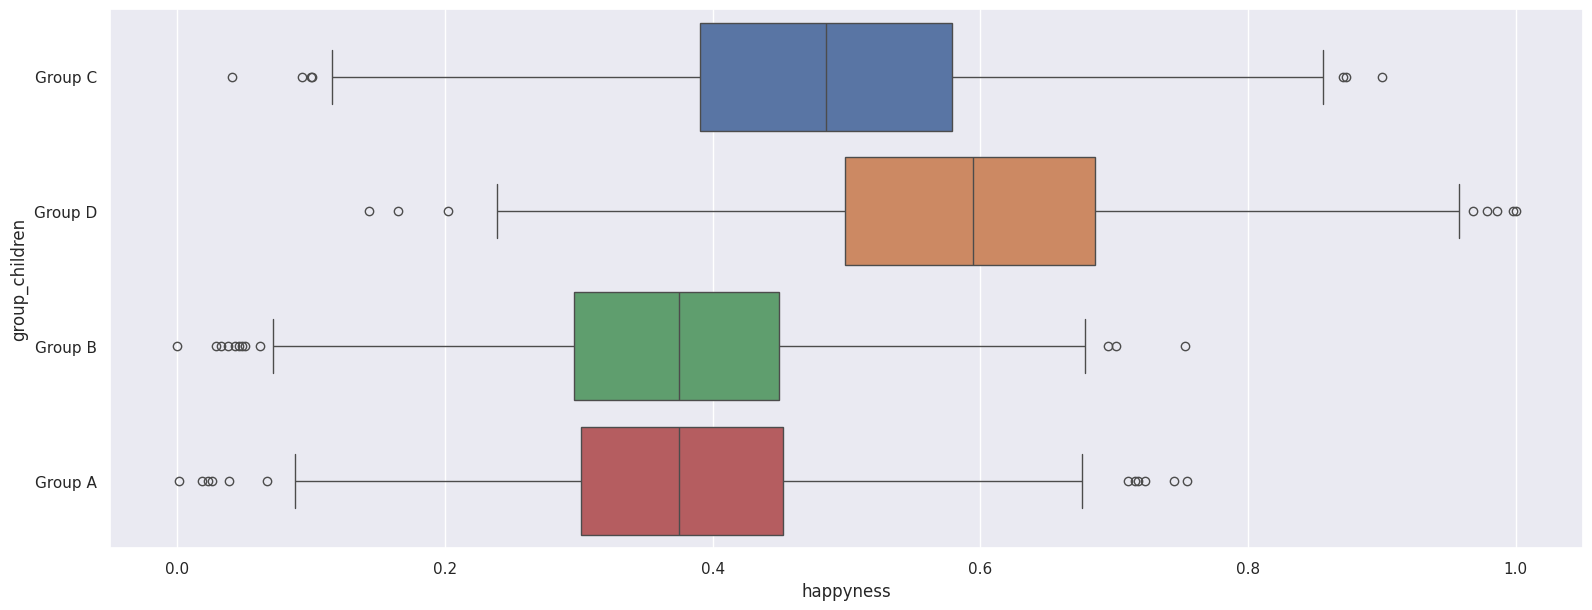

In [10]:
# Гистограммы
sns.displot(sub_data, x="happyness", hue="group_children", bins=55, height=5, aspect=2.5)

# Гистограммы со сглаживанием
sns.displot(sub_data, x="happyness", hue="group_children", height=5, aspect=2.5, kind="kde")

# Бокс-плоты
plt.figure(figsize=(19, 7))
sns.boxplot(data=sub_data, y="group_children", x="happyness", hue="group_children", orient='h');

In [11]:
alpha = 0.05

# Группы по количеству детей
group_a = data_work[data_work["children"] == 0]["happyness"]  # Нет детей
group_b = data_work[data_work["children"] == 1]["happyness"]  # Один ребёнок
group_c = data_work[(data_work["children"] > 1) & (data_work["children"] < 5)]["happyness"]  # От 2 до 4 детей
group_d = data_work[data_work["children"] >= 5]["happyness"]  # Пять и более детей
# Используем дисперсионнай анализ
statistic, pvalue = stats.f_oneway(
    group_a,
    group_b,
    group_c,
    group_d,
)

print("Используем дисперсионнай анализ:")
print("statistic = {}, p-value = {}".format(statistic, pvalue))

if pvalue > alpha:  # Интерпретируем результат
    print("Одинаковое распределение (не отвергаем H0)")
else:
    print("Разное распределение (отклоняем H0)")
    print("Выборки отличаются статистически значимо")

# Теперь вычисляем Крускал Уоллис тест
statistic, pvalue = stats.kruskal(
    group_a,
    group_b,
    group_c,
    group_d,
)

print("\nТеперь вычисляем Крускал Уоллис тест:")
print("statistic = {}, p-value = {}".format(statistic, pvalue))

if pvalue > alpha:  # Интерпретируем результат
    print("Одинаковое распределение (не отвергаем H0)")
else:
    print("Разное распределение (отклоняем H0)")
    print("Выборки отличаются статистически значимо")

Используем дисперсионнай анализ:
statistic = 907.3405570341325, p-value = 0.0
Разное распределение (отклоняем H0)
Выборки отличаются статистически значимо

Теперь вычисляем Крускал Уоллис тест:
statistic = 1870.691213043603, p-value = 0.0
Разное распределение (отклоняем H0)
Выборки отличаются статистически значимо


Правда: эти группы отличаются статистически значимо по уровню счастья
Правда: эти группы отличаются статистически значимо по уровню дохода